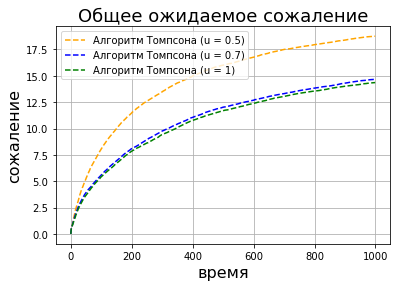

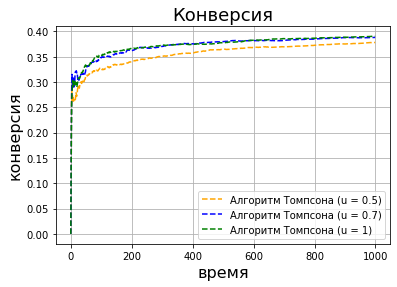

In [10]:
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import matplotlib.patches as mpatches

p = []
p.append(float(0.1))
p.append(float(0.3))
p.append(float(0.4))
n = len(p)

n_show = 1000  # количество показов 5000
n_start = 50  # количество запусков 50


# ------------------ОБЩИЕ ФУНКЦИИ-----------------------

# функция показа страницы
def show_page(number_page, reward_show, number_show):
	reward_show[number_page] += bernoulli.rvs(p[number_page])
	number_show[number_page] += 1
	return 0

# вычисление функции сожаления
# принимает массив выбираемых страниц
def regret(par_list):
	# поиск индекса лучшей страницы
	temp_best_index_page = p.index(max(p))
	temp_regret_list = [0 for i in range(n_show)]
	for i in range(n_show):
		j, temp_var = 0, 0
		while j < i:
			temp_var += p[par_list[j]]
			j += 1
		temp_regret_list[i] = i * p[temp_best_index_page] - temp_var
	return temp_regret_list


# ------------------EPSILON-GREEDY-----------------------

epsilon = 0.05
sum_regret_list_e_greedy = [0 for i in range(n_show)]
sum_reward_show_e_greedy = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_e_greedy = [1 for i in range(n)]  # количество показов страниц
sum_ctr_e_greedy = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_e_greedy = [0 for i in range(n_show)]

epsilon_2 = 0.1
sum_regret_list_e_greedy_2 = [0 for i in range(n_show)]
sum_reward_show_e_greedy_2 = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_e_greedy_2 = [1 for i in range(n)]  # количество показов страниц
sum_ctr_e_greedy_2 = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_e_greedy_2 = [0 for i in range(n_show)]

epsilon_3 = 0.2
sum_regret_list_e_greedy_3 = [0 for i in range(n_show)]
sum_reward_show_e_greedy_3 = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_e_greedy_3 = [1 for i in range(n)]  # количество показов страниц
sum_ctr_e_greedy_3 = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_e_greedy_3 = [0 for i in range(n_show)]

# функция алгоритма epsilon-greedy
def e_greedy(epsilon):
	x = random.random()
	# формируем массив ctr
	for i in range(n):
		ctr_e_greedy[i] = reward_show_e_greedy[i] / number_show_e_greedy[i]

	# ищем лучшую страницу
	best_page_index = ctr_e_greedy.index(max(ctr_e_greedy))

	if x < 1 - epsilon:
		return best_page_index
	else:
		best_page_index = random.randint(0, n - 1)
		return best_page_index


# -------------------------UCB1----------------------------

sum_regret_list_ucb = [0 for i in range(n_show)]
sum_reward_show_ucb = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_ucb = [1 for i in range(n)]  # количество показов страниц
sum_ctr_ucb = [0 for i in range(n)]
sum_mean_ctr_list_ucb = [0 for i in range(n_show)]

sum_regret_list_ucb_2 = [0 for i in range(n_show)]
sum_reward_show_ucb_2 = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_ucb_2 = [1 for i in range(n)]  # количество показов страниц
sum_ctr_ucb_2 = [0 for i in range(n)]
sum_mean_ctr_list_ucb_2 = [0 for i in range(n_show)]

sum_regret_list_ucb_3 = [0 for i in range(n_show)]
sum_reward_show_ucb_3 = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_ucb_3 = [1 for i in range(n)]  # количество показов страниц
sum_ctr_ucb_3 = [0 for i in range(n)]
sum_mean_ctr_list_ucb_3 = [0 for i in range(n_show)]

def ucb(t, h):
	# формируем массив ctr
	#h = 1
	for i in range(n):
		ctr_ucb[i] = reward_show_ucb[i] / number_show_ucb[i]

	max_temp = reward_show_ucb[0] / number_show_ucb[0] + h * math.sqrt(2 * math.log(t) / number_show_ucb[0])
	#p_12 = reward_show_ucb[0] / number_show_ucb[0]
	#max_temp = p_12 + h * math.sqrt(p_12 * (1 - p_12)/number_show_ucb[0])
	best_page_index = 0
	temp = [0 for i in range(n)]
	for i in range(n):
		temp[i] = reward_show_ucb[i] / number_show_ucb[i] + h * math.sqrt(2 * math.log(t) / number_show_ucb[i])
		#p_11 = reward_show_ucb[i] / number_show_ucb[i]
		#temp[i] = p_11 + h * math.sqrt(p_11 * (1 -p_11)/number_show_ucb[i])
		if temp[i] > max_temp:
			max_temp = temp[i]
			best_page_index = i
	return best_page_index

# ---------------------Thompson Sampling--------------------

sum_regret_list_sampling = [0 for i in range(n_show)]
sum_reward_show_sampling = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_sampling = [1 for i in range(n)]  # количество показов страниц
sum_ctr_sampling = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_sampling = [0 for i in range(n_show)]

sum_regret_list_sampling_2 = [0 for i in range(n_show)]
sum_reward_show_sampling_2 = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_sampling_2 = [1 for i in range(n)]  # количество показов страниц
sum_ctr_sampling_2 = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_sampling_2 = [0 for i in range(n_show)]

sum_regret_list_sampling_3 = [0 for i in range(n_show)]
sum_reward_show_sampling_3 = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_sampling_3 = [1 for i in range(n)]  # количество показов страниц
sum_ctr_sampling_3 = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_sampling_3 = [0 for i in range(n_show)]


def thompson_sampling(u):
	# формируем массив ctr
	for i in range(n):
		ctr_sampling[i] = reward_show_sampling[i] / number_show_sampling[i]

	# считаем вероятности и находим max
	maximum, best_page_index, i = 0, 0, 0
	while i < n:
		beta_rasp = random.betavariate(reward_show_sampling[i] + 1, number_show_sampling[i] - reward_show_sampling[i] + 1)
		#beta_rasp = u
		if beta_rasp > maximum and beta_rasp < u:
		#if beta_rasp > u:
			maximum = beta_rasp
			best_page_index = i
		i += 1
	return best_page_index



# главный цикл
# все алгоритмы в одном цикле
n_count = 0
while n_count < n_start:
	# для epsilon-greedy 1
	reward_show_e_greedy = [0 for i in range(n)]  # награда от показа страницы
	number_show_e_greedy = [1 for i in range(n)]  # количество показов страниц
	ctr_e_greedy = [0 for i in range(n)]  # click-through-rate
	page_in_time_e_greedy = [0 for i in range(n_show)]
	mean_ctr_list_e_greedy = [0 for i in range(n_show)]

    # для epsilon-greedy 2
	reward_show_e_greedy_2 = [0 for i in range(n)]  # награда от показа страницы
	number_show_e_greedy_2 = [1 for i in range(n)]  # количество показов страниц
	ctr_e_greedy_2 = [0 for i in range(n)]  # click-through-rate
	page_in_time_e_greedy_2 = [0 for i in range(n_show)]
	mean_ctr_list_e_greedy_2 = [0 for i in range(n_show)]
 
	# для epsilon-greedy 3
	reward_show_e_greedy_3 = [0 for i in range(n)]  # награда от показа страницы
	number_show_e_greedy_3 = [1 for i in range(n)]  # количество показов страниц
	ctr_e_greedy_3 = [0 for i in range(n)]  # click-through-rate
	page_in_time_e_greedy_3 = [0 for i in range(n_show)]
	mean_ctr_list_e_greedy_3 = [0 for i in range(n_show)]
 

	# для UCB1
	reward_show_ucb = [0 for i in range(n)]  # награда от показа страницы
	number_show_ucb = [1 for i in range(n)]  # количество показов страниц
	ctr_ucb = [0 for i in range(n)]  # click-through-rate
	page_in_time_ucb = [0 for i in range(n_show)]
	mean_ctr_list_ucb = [0 for i in range(n_show)]

	# для UCB1 2
	reward_show_ucb_2 = [0 for i in range(n)]  # награда от показа страницы
	number_show_ucb_2 = [1 for i in range(n)]  # количество показов страниц
	ctr_ucb_2 = [0 for i in range(n)]  # click-through-rate
	page_in_time_ucb_2 = [0 for i in range(n_show)]
	mean_ctr_list_ucb_2 = [0 for i in range(n_show)]
 
	# для UCB1 3
	reward_show_ucb_3 = [0 for i in range(n)]  # награда от показа страницы
	number_show_ucb_3 = [1 for i in range(n)]  # количество показов страниц
	ctr_ucb_3 = [0 for i in range(n)]  # click-through-rate
	page_in_time_ucb_3 = [0 for i in range(n_show)]
	mean_ctr_list_ucb_3 = [0 for i in range(n_show)]
 

	# для Thompson Sampling
	reward_show_sampling = [0 for i in range(n)]  # награда от показа страницы
	number_show_sampling = [1 for i in range(n)]  # количество показов страниц
	ctr_sampling = [0 for i in range(n)]  # click-through-rate
	page_in_time_sampling = [0 for i in range(n_show)]
	mean_ctr_list_sampling = [0 for i in range(n_show)]
 
	# для Thompson Sampling 2
	reward_show_sampling_2 = [0 for i in range(n)]  # награда от показа страницы
	number_show_sampling_2 = [1 for i in range(n)]  # количество показов страниц
	ctr_sampling_2 = [0 for i in range(n)]  # click-through-rate
	page_in_time_sampling_2 = [0 for i in range(n_show)]
	mean_ctr_list_sampling_2 = [0 for i in range(n_show)]

	# для Thompson Sampling 3
	reward_show_sampling_3 = [0 for i in range(n)]  # награда от показа страницы
	number_show_sampling_3 = [1 for i in range(n)]  # количество показов страниц
	ctr_sampling_3 = [0 for i in range(n)]  # click-through-rate
	page_in_time_sampling_3 = [0 for i in range(n_show)]
	mean_ctr_list_sampling_3 = [0 for i in range(n_show)]

	t = 1
	while t < n_show:
		# для первого паказа каждого баннера
		if t == 1:
			page_index = 0
		if t == 2:
			page_index = 1
		if t == 3:
			page_index = 2
   
		mean_ctr = 0
		# epsilon-greedy
		#page_index = e_greedy(epsilon)
		if t > 3:
			page_index = e_greedy(epsilon)
		page_in_time_e_greedy[t] = page_index
		show_page(page_index, reward_show_e_greedy, number_show_e_greedy)

		for i in range(n):
			mean_ctr += reward_show_e_greedy[i]

		mean_ctr_list_e_greedy[t] = mean_ctr / t
  
        # epsilon-greedy 2
		mean_ctr_2 = 0
		if t > 3:
			page_index = e_greedy(epsilon_2)
		page_in_time_e_greedy_2[t] = page_index
		show_page(page_index, reward_show_e_greedy_2, number_show_e_greedy_2)

		for i in range(n):
			mean_ctr_2 += reward_show_e_greedy_2[i]

		mean_ctr_list_e_greedy_2[t] = mean_ctr_2 / t
  
		# epsilon-greedy 3
		mean_ctr_3 = 0
		if t > 3:
			page_index = e_greedy(epsilon_3)
		page_in_time_e_greedy_3[t] = page_index
		show_page(page_index, reward_show_e_greedy_3, number_show_e_greedy_3)

		for i in range(n):
			mean_ctr_3 += reward_show_e_greedy_3[i]

		mean_ctr_list_e_greedy_3[t] = mean_ctr_3 / t
  

		# UCB1 1
		mean_ctr = 0
		h = 0.5
		if t > 3:
			page_index = ucb(t, h)
		page_in_time_ucb[t] = page_index
		show_page(page_index, reward_show_ucb, number_show_ucb)

		for i in range(n):
			mean_ctr += reward_show_ucb[i]

		mean_ctr_list_ucb[t] = mean_ctr / t
		
  		# UCB1 2
		mean_ctr_2 = 0
		h = 0.7
		if t > 3:
			page_index = ucb(t, h)
		page_in_time_ucb_2[t] = page_index
		show_page(page_index, reward_show_ucb_2, number_show_ucb_2)

		for i in range(n):
			mean_ctr_2 += reward_show_ucb_2[i]

		mean_ctr_list_ucb_2[t] = mean_ctr_2 / t
  
		# UCB1 3
		mean_ctr_3 = 0
		h = 1
		if t > 3:
			page_index = ucb(t, h)
		page_in_time_ucb_3[t] = page_index
		show_page(page_index, reward_show_ucb_3, number_show_ucb_3)

		for i in range(n):
			mean_ctr_3 += reward_show_ucb_3[i]

		mean_ctr_list_ucb_3[t] = mean_ctr_3 / t



		# Thompson Sampling
		mean_ctr = 0
		u = 0.5
		if t > 3:
			page_index = thompson_sampling(u)
		page_in_time_sampling[t] = page_index
		show_page(page_index, reward_show_sampling, number_show_sampling)

		for i in range(n):
			mean_ctr += reward_show_sampling[i]

		mean_ctr_list_sampling[t] = mean_ctr / t
  
		# Thompson Sampling 2
		u = 0.7
		mean_ctr_2 = 0
		if t > 3:
			page_index = thompson_sampling(u)
		page_in_time_sampling_2[t] = page_index
		show_page(page_index, reward_show_sampling_2, number_show_sampling_2)

		for i in range(n):
			mean_ctr_2 += reward_show_sampling_2[i]

		mean_ctr_list_sampling_2[t] = mean_ctr_2 / t

		# Thompson Sampling 3
		u = 1
		mean_ctr_3 = 0
		if t > 3:
			page_index = thompson_sampling(u)
		page_in_time_sampling_3[t] = page_index
		show_page(page_index, reward_show_sampling_3, number_show_sampling_3)

		for i in range(n):
			mean_ctr_3 += reward_show_sampling_3[i]

		mean_ctr_list_sampling_3[t] = mean_ctr_3 / t
  
		t += 1

	# вычисление вектора сожаления
	regret_list_e_greedy = regret(page_in_time_e_greedy)
	regret_list_e_greedy_2 = regret(page_in_time_e_greedy_2)
	regret_list_e_greedy_3 = regret(page_in_time_e_greedy_3)
	regret_list_ucb = regret(page_in_time_ucb)
	regret_list_ucb_2 = regret(page_in_time_ucb_2)
	regret_list_ucb_3 = regret(page_in_time_ucb_3)
	regret_list_sampling = regret(page_in_time_sampling)
	regret_list_sampling_2 = regret(page_in_time_sampling_2)
	regret_list_sampling_3 = regret(page_in_time_sampling_3)

	# вычисление суммарного вектора сожаления
	for i in range(n_show):
		sum_regret_list_e_greedy[i] += regret_list_e_greedy[i]
		sum_regret_list_e_greedy_2[i] += regret_list_e_greedy_2[i]
		sum_regret_list_e_greedy_3[i] += regret_list_e_greedy_3[i]
		sum_regret_list_ucb[i] += regret_list_ucb[i]
		sum_regret_list_ucb_2[i] += regret_list_ucb_2[i]
		sum_regret_list_ucb_3[i] += regret_list_ucb_3[i]
		sum_regret_list_sampling[i] += regret_list_sampling[i]
		sum_regret_list_sampling_2[i] += regret_list_sampling_2[i]
		sum_regret_list_sampling_3[i] += regret_list_sampling_3[i]

		# вычисление среднего ctr
		sum_mean_ctr_list_e_greedy[i] += mean_ctr_list_e_greedy[i]
		sum_mean_ctr_list_e_greedy_2[i] += mean_ctr_list_e_greedy_2[i]
		sum_mean_ctr_list_e_greedy_3[i] += mean_ctr_list_e_greedy_3[i]
		sum_mean_ctr_list_ucb[i] += mean_ctr_list_ucb[i]
		sum_mean_ctr_list_ucb_2[i] += mean_ctr_list_ucb_2[i]
		sum_mean_ctr_list_ucb_3[i] += mean_ctr_list_ucb_3[i]
		sum_mean_ctr_list_sampling[i] += mean_ctr_list_sampling[i]
		sum_mean_ctr_list_sampling_2[i] += mean_ctr_list_sampling_2[i]
		sum_mean_ctr_list_sampling_3[i] += mean_ctr_list_sampling_3[i]

	for i in range(n):
		# epsilon-greedy
		sum_number_show_e_greedy[i] += number_show_e_greedy[i]
		sum_reward_show_e_greedy[i] += reward_show_e_greedy[i]
		sum_ctr_e_greedy[i] += ctr_e_greedy[i]
  
        # epsilon-greedy 2
		sum_number_show_e_greedy_2[i] += number_show_e_greedy_2[i]
		sum_reward_show_e_greedy_2[i] += reward_show_e_greedy_2[i]
		sum_ctr_e_greedy_2[i] += ctr_e_greedy[i]
  
		# epsilon-greedy 3
		sum_number_show_e_greedy_3[i] += number_show_e_greedy_3[i]
		sum_reward_show_e_greedy_3[i] += reward_show_e_greedy_3[i]
		sum_ctr_e_greedy_3[i] += ctr_e_greedy[i]
  

		# ucb1
		sum_number_show_ucb[i] += number_show_ucb[i]
		sum_reward_show_ucb[i] += reward_show_ucb[i]
		sum_ctr_ucb[i] += ctr_ucb[i]
  
		# ucb1 2
		sum_number_show_ucb_2[i] += number_show_ucb_2[i]
		sum_reward_show_ucb_2[i] += reward_show_ucb_2[i]
		sum_ctr_ucb_2[i] += ctr_ucb_2[i]
  
		# ucb1 3
		sum_number_show_ucb_3[i] += number_show_ucb_3[i]
		sum_reward_show_ucb_3[i] += reward_show_ucb_3[i]
		sum_ctr_ucb_3[i] += ctr_ucb_3[i]
  

		# thompson sampling
		sum_number_show_sampling[i] += number_show_sampling[i]
		sum_reward_show_sampling[i] += reward_show_sampling[i]
		sum_ctr_sampling[i] += ctr_sampling[i]
  
		# thompson sampling 2
		sum_number_show_sampling_2[i] += number_show_sampling_2[i]
		sum_reward_show_sampling_2[i] += reward_show_sampling_2[i]
		sum_ctr_sampling_2[i] += ctr_sampling[i]
	
		# thompson sampling 3
		sum_number_show_sampling_3[i] += number_show_sampling_3[i]
		sum_reward_show_sampling_3[i] += reward_show_sampling_3[i]
		sum_ctr_sampling_3[i] += ctr_sampling[i]

	n_count += 1


for i in range(n_show):
	# regret
	sum_regret_list_e_greedy[i] /= n_start
	sum_regret_list_e_greedy_2[i] /= n_start
	sum_regret_list_e_greedy_3[i] /= n_start
	sum_regret_list_ucb[i] /= n_start
	sum_regret_list_ucb_2[i] /= n_start
	sum_regret_list_ucb_3[i] /= n_start
	sum_regret_list_sampling[i] /= n_start
	sum_regret_list_sampling_2[i] /= n_start
	sum_regret_list_sampling_3[i] /= n_start

	# ctr
	sum_mean_ctr_list_e_greedy[i] /= n_start
	sum_mean_ctr_list_e_greedy_2[i] /= n_start
	sum_mean_ctr_list_e_greedy_3[i] /= n_start
	sum_mean_ctr_list_ucb[i] /= n_start
	sum_mean_ctr_list_ucb_2[i] /= n_start
	sum_mean_ctr_list_ucb_3[i] /= n_start
	sum_mean_ctr_list_sampling[i] /= n_start
	sum_mean_ctr_list_sampling_2[i] /= n_start
	sum_mean_ctr_list_sampling_3[i] /= n_start


for i in range(n):
	sum_reward_show_e_greedy[i] /= n_start
	sum_number_show_e_greedy[i] /= n_start
	sum_ctr_e_greedy[i] /= n_start

	sum_reward_show_e_greedy_2[i] /= n_start
	sum_number_show_e_greedy_2[i] /= n_start
	sum_ctr_e_greedy_2[i] /= n_start

	sum_reward_show_e_greedy_3[i] /= n_start
	sum_number_show_e_greedy_3[i] /= n_start
	sum_ctr_e_greedy_3[i] /= n_start

	sum_reward_show_ucb[i] /= n_start
	sum_number_show_ucb[i] /= n_start
	sum_ctr_ucb[i] /= n_start

	sum_reward_show_ucb_2[i] /= n_start
	sum_number_show_ucb_2[i] /= n_start
	sum_ctr_ucb_2[i] /= n_start

	sum_reward_show_ucb_3[i] /= n_start
	sum_number_show_ucb_3[i] /= n_start
	sum_ctr_ucb_3[i] /= n_start

	sum_reward_show_sampling[i] /= n_start
	sum_number_show_sampling[i] /= n_start
	sum_ctr_sampling[i] /= n_start
 
	sum_reward_show_sampling_2[i] /= n_start
	sum_number_show_sampling_2[i] /= n_start
	sum_ctr_sampling_2[i] /= n_start
 
	sum_reward_show_sampling_3[i] /= n_start
	sum_number_show_sampling_3[i] /= n_start
	sum_ctr_sampling_3[i] /= n_start

#alg = 'eps'
#alg = 'usb'
alg = 'ts'
# первый график
time = [i for i in range(n_show)]
plt.figure(1)
if alg == 'eps':
	plt.plot(time, sum_regret_list_e_greedy, linestyle='--', label='Эпсилон-жадный(eps=' + str(epsilon) + ')')
	plt.plot(time, sum_regret_list_e_greedy_2, linestyle='--', color='red', label='Эпсилон-жадный(eps=' + str(epsilon_2) + ')')
	plt.plot(time, sum_regret_list_e_greedy_3, linestyle='--', color='violet', label='Эпсилон-жадный(eps=' + str(epsilon_3) + ')')
if alg == 'usb':
	plt.plot(time, sum_regret_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
	plt.plot(time, sum_regret_list_ucb_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
	plt.plot(time, sum_regret_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')
if alg == 'ts': 
	plt.plot(time, sum_regret_list_sampling, linestyle='--', color='orange', label='Алгоритм Томпсона (u = 0.5)')
	plt.plot(time, sum_regret_list_sampling_2, linestyle='--', color='blue', label='Алгоритм Томпсона (u = 0.7)')
	plt.plot(time, sum_regret_list_sampling_3, linestyle='--', color='green', label='Алгоритм Томпсона (u = 1)')

plt.title('Общее ожидаемое сожаление', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('сожаление', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('ts_сожаление_4.png')
plt.show()


# второй график
plt.figure(2)
if alg == 'eps':
	plt.plot(time, sum_mean_ctr_list_e_greedy, linestyle='--', label='Эпсилон-жадный(eps=' + str(epsilon) + ')')
	plt.plot(time, sum_mean_ctr_list_e_greedy_2, linestyle='--', color='red', label='Эпсилон-жадный(eps=' + str(epsilon_2) + ')')
	plt.plot(time, sum_mean_ctr_list_e_greedy_3, linestyle='--', color='violet', label='Эпсилон-жадный(eps=' + str(epsilon_3) + ')')
if alg == 'usb':
	plt.plot(time, sum_mean_ctr_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
	plt.plot(time, sum_mean_ctr_list_ucb_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
	plt.plot(time, sum_mean_ctr_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')
if alg == 'ts': 
	plt.plot(time, sum_mean_ctr_list_sampling, linestyle='--', color='orange', label='Алгоритм Томпсона (u = 0.5)')
	plt.plot(time, sum_mean_ctr_list_sampling_2, linestyle='--', color='blue', label='Алгоритм Томпсона (u = 0.7)')
	plt.plot(time, sum_mean_ctr_list_sampling_3, linestyle='--', color='green', label='Алгоритм Томпсона (u = 1)')

plt.title('Конверсия', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('конверсия', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ts_конверсия_4.png')
plt.show()

In [11]:
# вывод данных epsilon-greedy
if alg == 'eps':
    print('-----Epsilon-greedy(eps=' + str(epsilon) + ')-----')
    print('number of show = ', sum_number_show_e_greedy)
    print('ctr of pages = ', sum_ctr_e_greedy)
    print('mean ctr = ', sum_mean_ctr_list_e_greedy[n_show - 1])
    print('\n')

    # вывод данных epsilon-greedy
    print('-----Epsilon-greedy(eps=' + str(epsilon_2) + ')-----')
    print('number of show = ', sum_number_show_e_greedy_2)
    print('ctr of pages = ', sum_ctr_e_greedy_2)
    print('mean ctr = ', sum_mean_ctr_list_e_greedy_2[n_show - 1])
    print('\n')

    # вывод данных epsilon-greedy
    print('-----Epsilon-greedy(eps=' + str(epsilon_3) + ')-----')
    print('number of show = ', sum_number_show_e_greedy_3)
    print('ctr of pages = ', sum_ctr_e_greedy_3)
    print('mean ctr = ', sum_mean_ctr_list_e_greedy_3[n_show - 1])
    print('\n')

# вывод данных UCB
if alg == 'usb':
    print('-----------UCB(h = 1)------------')
    print('number of show = ', sum_number_show_ucb)
    print('ctr of pages = ', sum_ctr_ucb)
    print('mean ctr = ', sum_mean_ctr_list_ucb[n_show - 1])
    print('\n')

    # вывод данных UCB
    print('-----------UCB(h = 2)------------')
    print('number of show = ', sum_number_show_ucb_2)
    print('ctr of pages = ', sum_ctr_ucb_2)
    print('mean ctr = ', sum_mean_ctr_list_ucb_2[n_show - 1])
    print('\n')

    # вывод данных UCB
    print('-----------UCB(h = 3)------------')
    print('number of show = ', sum_number_show_ucb_3)
    print('ctr of pages = ', sum_ctr_ucb_3)
    print('mean ctr = ', sum_mean_ctr_list_ucb_3[n_show - 1])
    print('\n')

# вывод данных Thompson Sampling
if alg == 'ts': 
    print('--Thompson Sampling(u = 0.5)-------')
    print('number of show = ', sum_number_show_sampling)
    print('ctr of pages = ', sum_ctr_sampling)
    print('mean ctr = ', sum_mean_ctr_list_sampling[n_show - 1])
    print('\n')
    
    print('--Thompson Sampling(u = 0.7)-------')
    print('number of show = ', sum_number_show_sampling_2)
    print('ctr of pages = ', sum_ctr_sampling_2)
    print('mean ctr = ', sum_mean_ctr_list_sampling_2[n_show - 1])
    print('\n')
    
    print('--Thompson Sampling(u = 1)-------')
    print('number of show = ', sum_number_show_sampling_3)
    print('ctr of pages = ', sum_ctr_sampling_3)
    print('mean ctr = ', sum_mean_ctr_list_sampling_3[n_show - 1])
    print('\n')

--Thompson Sampling(u = 0.5)-------
number of show =  [21.08, 125.42, 855.56]
ctr of pages =  [0.07309362311531478, 0.26640394708631676, 0.39587095194871524]
mean ctr =  0.3780580580580581


--Thompson Sampling(u = 0.7)-------
number of show =  [13.36, 107.76, 880.94]
ctr of pages =  [0.07309362311531478, 0.26640394708631676, 0.39587095194871524]
mean ctr =  0.38798798798798784


--Thompson Sampling(u = 1)-------
number of show =  [12.28, 107.86, 881.92]
ctr of pages =  [0.07309362311531478, 0.26640394708631676, 0.39587095194871524]
mean ctr =  0.39019019019019013




In [12]:
def grafik(page_in_time, sum_mean_ctr_list, name):
    plt.figure(3)
    plt.plot(time, sum_mean_ctr_list, c = "grey", linestyle = 'solid', lw = 1.5)
    plt.title(name, fontsize=18)
    plt.xlabel('время', fontsize=16)
    plt.ylabel('сожаление', fontsize=16)
    plt.legend(loc='upper left')
        
    blue_patch = mpatches.Patch(color = 'blue', label = 'Баннер 0')
    green_patch = mpatches.Patch(color = 'green', label = 'Баннер 1')
    magenta_patch = mpatches.Patch(color = 'magenta', label = 'Баннер 2')
    plt.legend(handles = [blue_patch, green_patch, magenta_patch])
    plt.grid(True)

    i = 1
    while i < n_show:
    # точки для графика
            if int(page_in_time[i]) == 0:
                    plt.plot(i, sum_mean_ctr_list[i], "bo")
            if int(page_in_time[i]) == 1:
                    plt.plot(i, sum_mean_ctr_list[i], "go")
            if int(page_in_time[i]) == 2:
                    plt.plot(i, sum_mean_ctr_list[i], "mo")
            i += 1

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


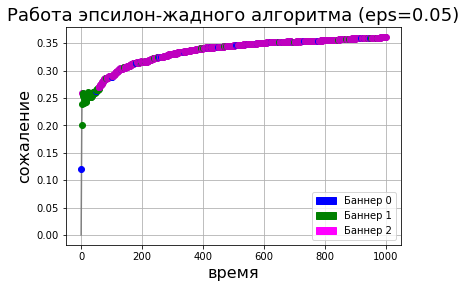

In [13]:
name = 'Работа эпсилон-жадного алгоритма (eps=' + str(epsilon) + ')'
grafik(page_in_time_e_greedy, sum_mean_ctr_list_e_greedy, name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


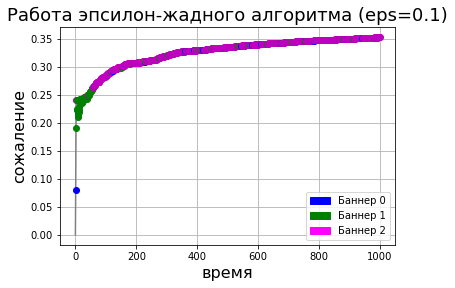

In [14]:
name = 'Работа эпсилон-жадного алгоритма (eps=' + str(epsilon_2) + ')'
grafik(page_in_time_e_greedy_2, sum_mean_ctr_list_e_greedy_2, name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


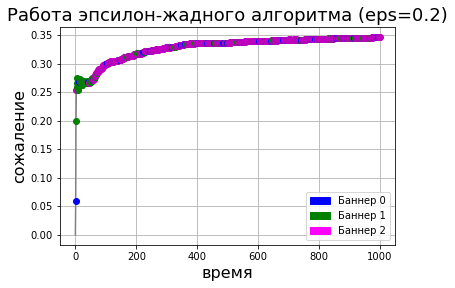

In [15]:
name = 'Работа эпсилон-жадного алгоритма (eps=' + str(epsilon_3) + ')'
grafik(page_in_time_e_greedy_3, sum_mean_ctr_list_e_greedy_3, name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


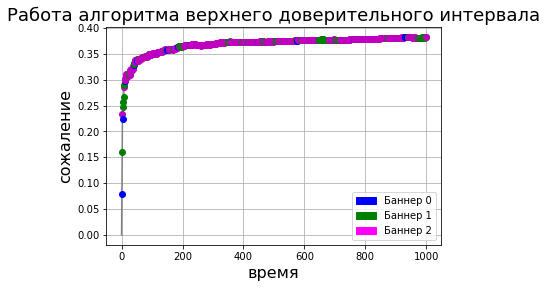

In [16]:
name = 'Работа алгоритма верхнего доверительного интервала'
grafik(page_in_time_ucb, sum_mean_ctr_list_ucb, name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


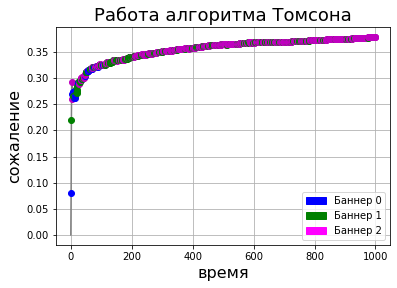

In [17]:
name = 'Работа алгоритма Томсона'
grafik(page_in_time_sampling, sum_mean_ctr_list_sampling, name)

In [18]:
# вывод данных epsilon-greedy
print('-----Epsilon-greedy(eps=' + str(epsilon) + ')-----')
print('number of show = ', sum_number_show_e_greedy)
print('ctr of pages = ', sum_ctr_e_greedy)
print('mean ctr = ', sum_mean_ctr_list_e_greedy[n_show - 1])
print('\n')

# вывод данных epsilon-greedy
print('-----Epsilon-greedy(eps=' + str(epsilon_2) + ')-----')
print('number of show = ', sum_number_show_e_greedy_2)
print('ctr of pages = ', sum_ctr_e_greedy_2)
print('mean ctr = ', sum_mean_ctr_list_e_greedy_2[n_show - 1])
print('\n')

# вывод данных epsilon-greedy
print('-----Epsilon-greedy(eps=' + str(epsilon_3) + ')-----')
print('number of show = ', sum_number_show_e_greedy_3)
print('ctr of pages = ', sum_ctr_e_greedy_3)
print('mean ctr = ', sum_mean_ctr_list_e_greedy_3[n_show - 1])
print('\n')

# вывод данных UCB
print('-----------UCB------------')
print('number of show = ', sum_number_show_ucb)
print('ctr of pages = ', sum_ctr_ucb)
print('mean ctr = ', sum_mean_ctr_list_ucb[n_show - 1])
print('\n')

# вывод данных Thompson Sampling
print('--Thompson Sampling-------')
print('number of show = ', sum_number_show_sampling)
print('ctr of pages = ', sum_ctr_sampling)
print('mean ctr = ', sum_mean_ctr_list_sampling[n_show - 1])
print('\n')

-----Epsilon-greedy(eps=0.05)-----
number of show =  [69.34, 219.54, 713.18]
ctr of pages =  [0.10153202840541668, 0.2807367192783818, 0.3675071526182879]
mean ctr =  0.36108108108108106


-----Epsilon-greedy(eps=0.1)-----
number of show =  [83.98, 225.44, 692.64]
ctr of pages =  [0.10153202840541668, 0.2807367192783818, 0.3675071526182879]
mean ctr =  0.35257257257257246


-----Epsilon-greedy(eps=0.2)-----
number of show =  [108.46, 240.0, 653.6]
ctr of pages =  [0.10153202840541668, 0.2807367192783818, 0.3675071526182879]
mean ctr =  0.3466066066066064


-----------UCB------------
number of show =  [25.88, 130.64, 845.54]
ctr of pages =  [0.07901315455414436, 0.278827049810985, 0.4011265741380827]
mean ctr =  0.38186186186186183


--Thompson Sampling-------
number of show =  [21.08, 125.42, 855.56]
ctr of pages =  [0.07309362311531478, 0.26640394708631676, 0.39587095194871524]
mean ctr =  0.3780580580580581


